In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [7]:
columns = ['user_id','order_dt','order_product','order_amount']
df = pd.read_csv('CDNOW_master.txt',names=columns,sep='\s+')  #\s+表示匹配任意空白符

In [8]:
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [9]:
df.describe()

,user_id,order_dt,order_product,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


用戶平均每筆訂單購買2.4個商品，標準差在2.3，稍稍具有波動性。中位數在2個商品，75分位數在3個商品，
說明絕大部分訂單的購買量都不多。最大值在99個，數字比較高。
購買金額的情況差不多，大部分訂單都集中在小額。

In [10]:
df.info() #可觀察到沒有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   order_dt       69659 non-null  int64  
 2   order_product  69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


pd.to_datetime可以將特定的字符串或者數字轉換成時間格式，其中的format參數用於匹配。例如19970101，%Y匹配前四位數字1997，如果y小寫只匹配兩位數字97，%m匹配01，%d匹配01。

另外，小時是%h，分鐘是%M，注意和月的大小寫不一致，秒是%s。若是1997-01-01這形式，則是%Y-%m-%d，以此類推。

astype也可以將時間格式進行轉換，比如[M]轉化成月份。我們將月份作為消費行為的主要事件窗口，選擇哪種時間窗口取決於消費頻率。

In [11]:
#要調整購買日期(order_dt)
df['order_date'] = pd.to_datetime(df.order_dt,format="%Y%m%d")

In [12]:
df['month'] = df.order_date.values.astype('datetime64[M]')

In [13]:
df.head() #月份依舊顯示日，只是變為月初的形式

,user_id,order_dt,order_product,order_amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


●觀察每位用戶(單一用戶可能同一天購買多次)

In [15]:
user_grouped = df.groupby('user_id').sum()
user_grouped.head()

,order_dt,order_product,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [16]:
user_grouped.describe()

,order_dt,order_product,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


從用戶角度看，每位用戶平均購買7張CD，最多的用戶購買了1033張，屬於狂熱用戶了。用戶的平均消費金額（客單價）100元，標準差是240，結合分位數和最大值看，平均值才和75分位接近，肯定存在小部分的高額消費用戶。


●按月分觀察
按月統計每個月的CD銷量。從圖中可以看到，前幾個月的銷量非常高漲。數據比較異常。而後期的銷量則很平穩。

<AxesSubplot:xlabel='month'>

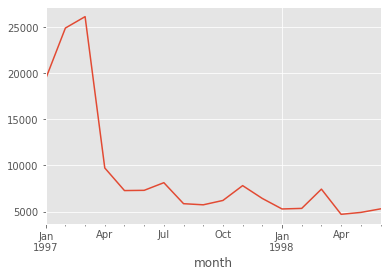

In [18]:
df.groupby('month').order_product.sum().plot()

金額一樣呈現早期銷售額多，後期平穩下降的趨勢。為什麼會呈現這個原因呢？我們假設是用戶身上出了問題，早期時間段的用戶中有異常值，第二假設是各類促銷營銷，但這裡只有消費數據，所以無法判斷。

<AxesSubplot:xlabel='month'>

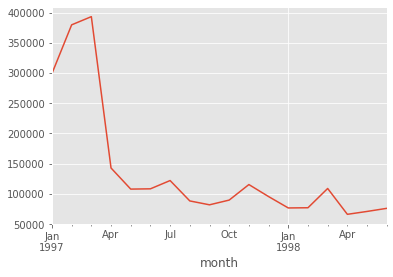

In [19]:
df.groupby('month').order_amount.sum().plot()

繪製每筆訂單的散點圖。從圖中觀察，訂單消費金額和訂單商品量呈規律性，每個商品十元左右。訂單的極值較少，超出1000的就幾個。顯然不是異常波動的罪魁禍首


<AxesSubplot:xlabel='order_amount', ylabel='order_product'>

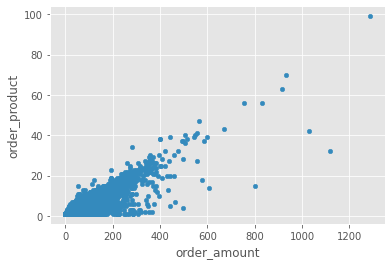

In [20]:
df.plot.scatter(x='order_amount',y='order_product')

繪製用戶的散點圖，用戶也比較健康，而且規律性比訂單更強。因為這是CD網站的銷售數據，商品比較單一，金額和商品量的關係也因此呈線性，沒幾個離群點。

<AxesSubplot:xlabel='order_amount', ylabel='order_product'>

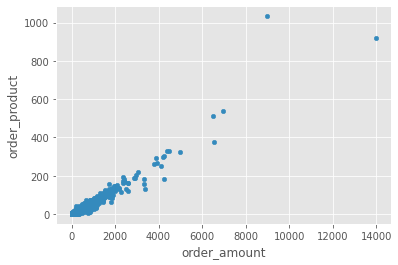

In [21]:
df.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_product')

消費能力強的數量不多。為了更好觀察，這裡使用直方圖。
部分用戶的消費能力確實不高，高消費用戶在圖上幾乎看不到。這也確實符合消費行為。

<AxesSubplot:>

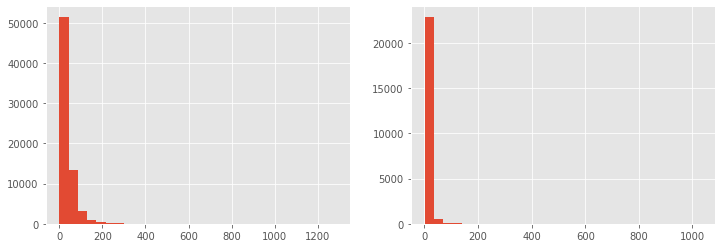

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df.order_amount.hist(bins=30)

plt.subplot(122)
df.groupby('user_id').order_product.sum().hist(bins=30)

●觀察消費的時間節點

用groupby函數將用戶分組，並且求月份的最小值，最小值即用戶消費行為中的第一次消費時間。

結果:所有用戶的第一次消費都集中在前三個月。我們可以這樣認為，案例中的訂單數據，只是選擇了某個時間段消費的用戶在18個月內的消費行為。


In [25]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

觀察用戶的最後一次消費時間。絕大部分數據依然集中在前三個月。後續的時間段內，依然有用戶在消費，但是緩慢減少。

In [26]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

●分析復購率和回購率
index是索引，column是欄，values是將哪個值進行計算，aggfunc是用哪種方法。統計order_dt出現的次數，即多少筆訂單。

統計每個用戶在每月的訂單量，所以user_id是index，month是column。

In [27]:
pivoted_counts = df.pivot_table(index = 'user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_counts.columns = columns_month

pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


將數據轉換一下，消費兩次及以上記為1，消費一次記為0，沒有消費記為NaN。

In [28]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x : 1 if x>1 else np.NaN if x ==0 else 0 )
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [29]:
pivoted_counts_transf.sum() # 消費兩次以上的加總

1997-01-01     844.0
1997-02-01    1178.0
1997-03-01    1479.0
1997-04-01     631.0
1997-05-01     436.0
1997-06-01     458.0
1997-07-01     469.0
1997-08-01     355.0
1997-09-01     352.0
1997-10-01     380.0
1997-11-01     410.0
1997-12-01     410.0
1998-01-01     324.0
1998-02-01     315.0
1998-03-01     473.0
1998-04-01     286.0
1998-05-01     298.0
1998-06-01     323.0
dtype: float64

In [30]:
pivoted_counts_transf.count() #總消費次數

1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

可看出復購率在早期，因為大量新用戶加入的關係，新客的復購率並不高，譬如1月新客們的復購率只有6%左右。而在後期，這時的用戶都是老客，復購率比較穩定，在20%左右。

<AxesSubplot:>

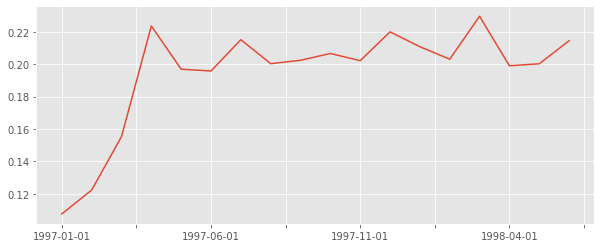

In [31]:
(pivoted_counts_transf.sum() /pivoted_counts_transf.count()).plot(figsize=(10,4))

●回購率:某一個時間窗口內消費的用戶，在下一個時間窗口仍舊消費的占比。ex:1月消費用戶1000，他們中有300個2月依然消費，回購率是30%。

In [32]:
pivoted_amount = df.pivot_table(index = 'user_id',columns = 'month',values = 'order_amount',aggfunc = 'mean').fillna(0)
columns_month = df.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month

In [33]:
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [53]:
pivoted_purchase = pivoted_amount.applymap(lambda x :1 if x>0 else 0)
pivoted_purchase.head() #有購買1，沒有購買0

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [43]:
#定義判斷有沒有回購的函數
def purchases_return(data):
    status = [] #用來儲存是否回購
    for i in range(17):
        if data[i] ==1: #若當月有購買
            if data[i+1] ==1: #次月有購買
                status.append(1) #則為1
            if data[i+1] ==0: #次月沒購買
                status.append(0) #則為0
        else:
            status.append(np.NaN) #當月就沒購買為NaN
    status.append(np.NaN)
    return status

In [54]:
pivoted_purchase_return = pivoted_purchase.apply(purchases_return,axis=1)
pivoted_purchase_return.head(5)

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

In [55]:
#(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(10,4))

將回購率和復購率綜合分析，可以得出，新客的整體質量低於老客，老客的忠誠度（回購率）表現較好，消費頻次稍次，這是CDNow網站的用戶消費特徵。

In [58]:
pivoted_purchase.apply(purchases_return,axis=1) #axis=1列

user_id
1        [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2        [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3        [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4        [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5        [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
                               ...                        
23566    [nan, nan, 0, nan, nan, nan, nan, nan, nan, na...
23567    [nan, nan, 0, nan, nan, nan, nan, nan, nan, na...
23568    [nan, nan, 1, 0, nan, nan, nan, nan, nan, nan,...
23569    [nan, nan, 0, nan, nan, nan, nan, nan, nan, na...
23570    [nan, nan, 0, nan, nan, nan, nan, nan, nan, na...
Length: 23570, dtype: object

# 分析用戶(新用戶、活躍用戶、不活躍用戶、回流用戶)

新用戶的定義是第一次消費。活躍用戶即老客，在某一個時間窗口內有過消費。不活躍用戶則是時間窗口內沒有消費過的老客。回流用戶是在上一個窗口中沒有消費，而在當前時間窗口內有過消費。以上的時間窗口都是按月統計。

In [68]:
def active_status(data):
    status = []
    for i in range(18):
        #若本月沒消費
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] =='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unareg')
                
        #若本月有消費
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] =='unactive':
                    status.append('return')
                elif status[i-1] =='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status